<a href="https://colab.research.google.com/github/RafaSouza-rs/DesafioTitanic/blob/main/TrabalhoTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas.

In [12]:
import pandas as pd


In [11]:
import numpy as np


In [10]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt


In [8]:
import random

In [7]:
import sklearn

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold

Leitura das tabelas train e test

In [16]:
train = pd.read_csv('train.csv')

In [17]:
test = pd.read_csv('test.csv')

In [18]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [23]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [26]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Análise Exploratória e Visualização de Dados:**

1- Explore a distribuição de características-chave, como idade, sexo, classe socioeconômica e taxa de sobrevivência.

2- Identifique padrões ou correlações entre as características e a sobrevivência dos passageiros.

3- Visualize esses padrões por meio de gráficos de barras, histogramas, gráficos de dispersão ou boxplots.

4- Investigue se existem diferenças na taxa de sobrevivência entre grupos, como homens e mulheres, ou diferentes classes de passageiros.

Verificando se existem valores nulos.

In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Podemos analisar que coluna Cabin tem 687 dados nulos, a coluna Age tem 177 dados nulos e na coluna de Embarked 2 informações nulas.

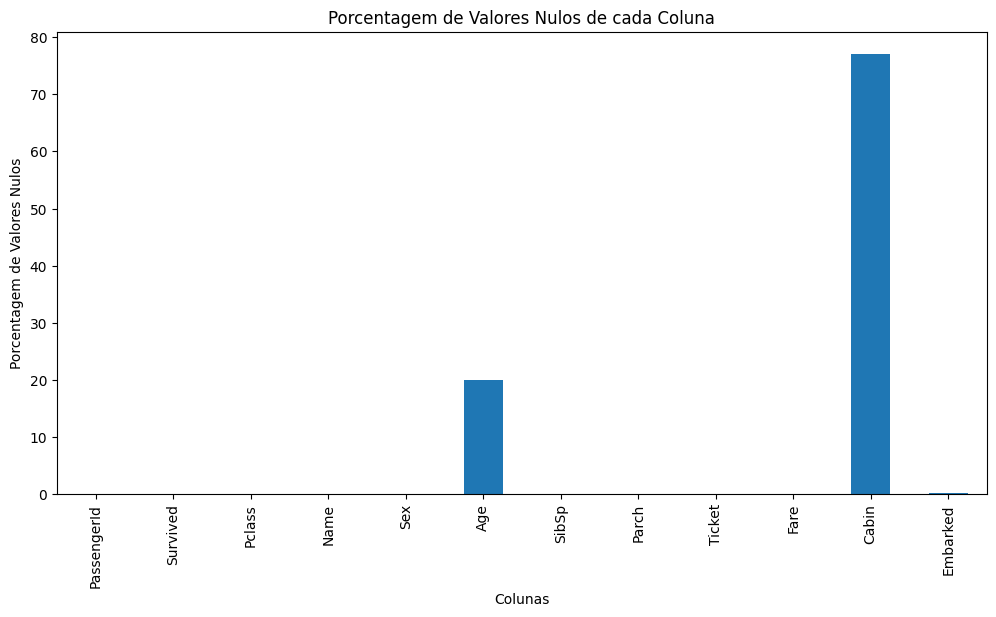

In [28]:
missing_data_percentage = (train.isnull().sum() / len(train)) * 100.0
plt.figure(figsize=(12, 6))
missing_data_percentage.plot(kind='bar')
plt.title('Porcentagem de Valores Nulos de cada Coluna')
plt.xlabel('Colunas')
plt.ylabel('Porcentagem de Valores Nulos')
plt.show()



Grafico de Idade

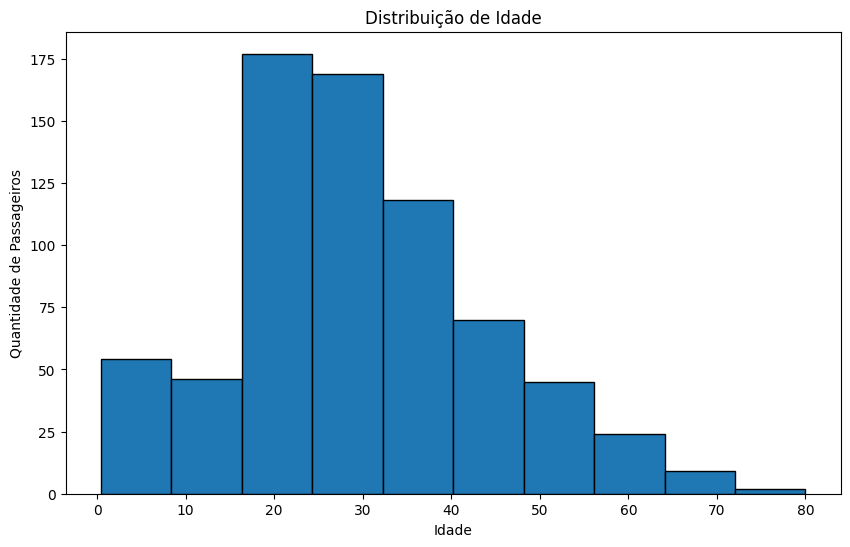

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(train['Age'].dropna(), bins=10, edgecolor='k')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()


Podemos perceber que o maior número de passageiros tinham entre 20 e 40 anos de idade.

Grafico de Idade com Taxa de Sobrevivencia.

<Figure size 800x600 with 0 Axes>

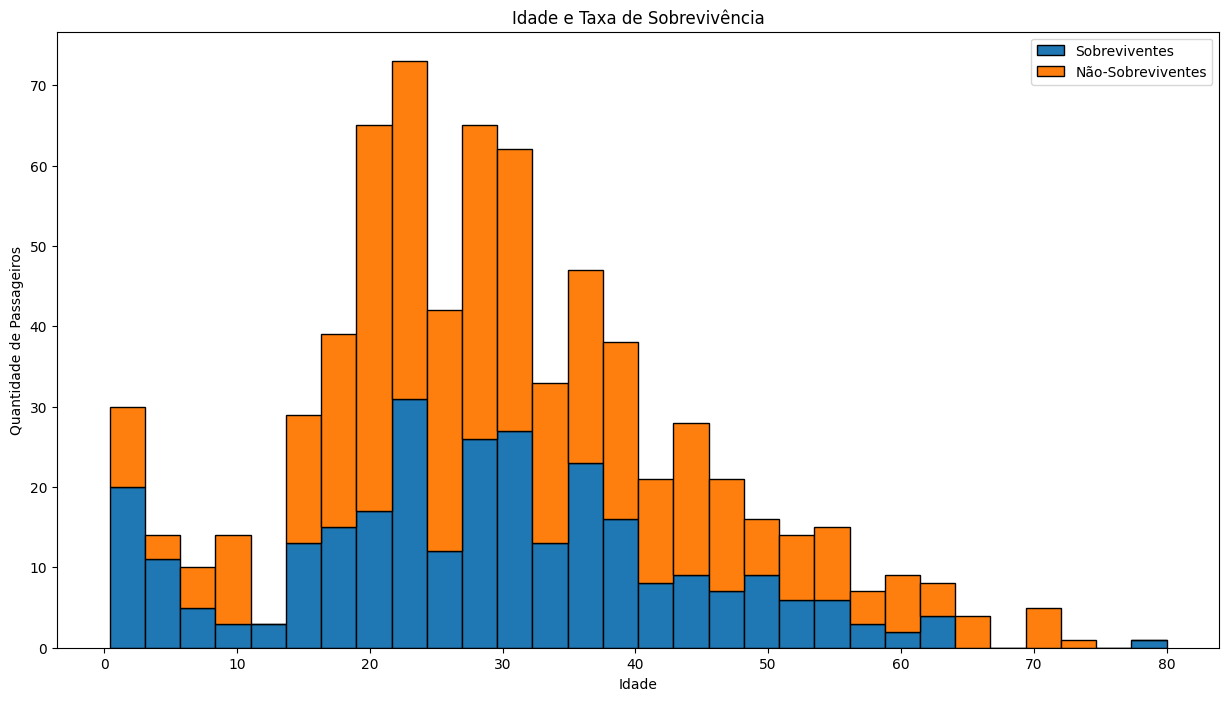

In [30]:
plt.figure(figsize=(8, 6))
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], stacked=True, edgecolor='k', bins=30, label=['Sobreviventes','Não-Sobreviventes'])
plt.title('Idade e Taxa de Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.legend()
plt.show()


Ao analisar o grafico podemos perceber que a maior taxa de sobrevivencia por idade são de adultos entre 20 e 40 anos, tambem podemos perceber que a taxa para crianças tambem tem um aumento.


Grafico de Sexo com Taxa de Sobrevivencia.

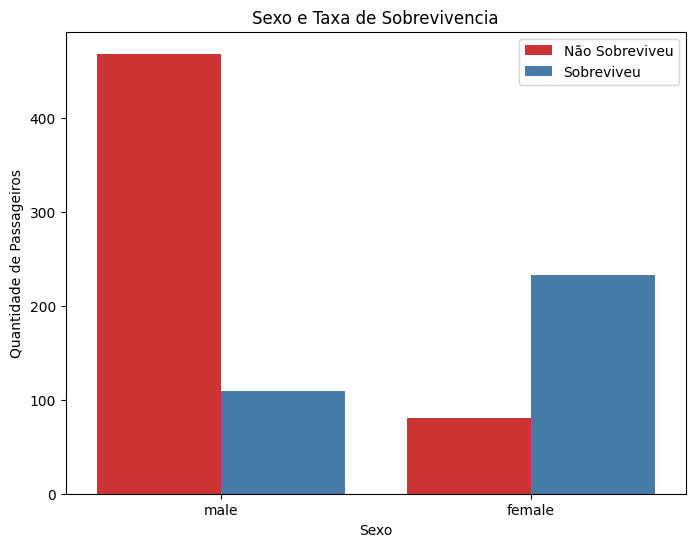

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Sex', hue='Survived', palette='Set1')
plt.title('Sexo e Taxa de Sobrevivencia')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Passageiros')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()



Podemos perceber que a maior taxa de sobrevivencia é feminina.

Classe Socioeconomica e Taxa de Sobrevivencia

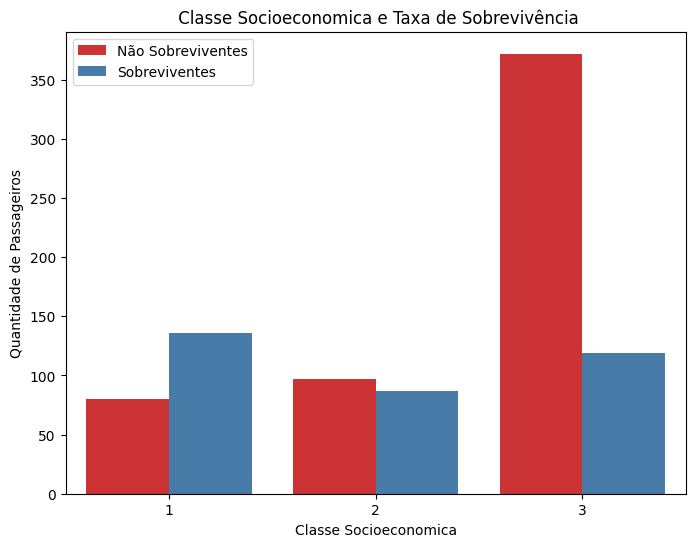

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Pclass', hue='Survived', palette='Set1')
plt.title(' Classe Socioeconomica e Taxa de Sobrevivência')
plt.xlabel('Classe Socioeconomica')
plt.ylabel('Quantidade de Passageiros')
plt.legend(['Não Sobreviventes','Sobreviventes'])
plt.show()


Analisando o grafico percebemos uma grande diferença. Os passageiros da terceira classe tiveram uma taxa muito grande de não sobrevivencia.
A pesar disso as tres classes tiveram quase a mesma quantidade de sobreviventes com a primeira classe sendo maior.

Gerando um histograma para cada coluna. Permitindo indentificar informações sobre os dados.

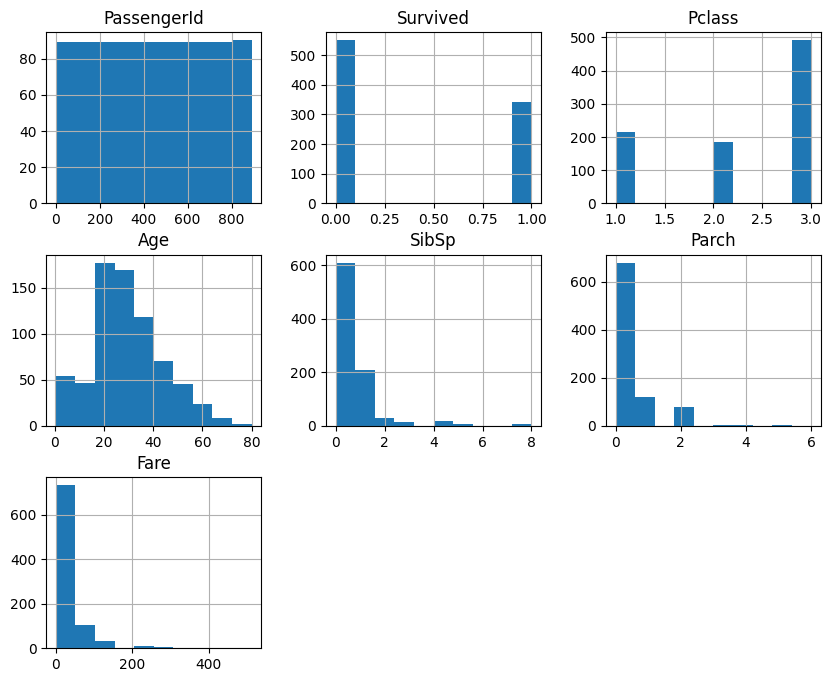

In [33]:
train.hist(figsize=(10,8));

*Colunas*


*   Passengerird: Identificador de cada passageiro.
*   Survived:  Indica se o passageiro sobreviveu.
*   Pclass: Classe do passageiro.
*   Name: Nome do passageiro.
*   Sex: Sexo do passageiro.
*   Age: Idade do passageiro.
*   SibSp: Número de irmãos/esposas a bordo.
*   Parch: Numero de pais/filhos a bordo.
*   Ticket: Número da passagem.
*   Fare: Preço da passagem.
*   Cabin: Cabine.
*   Embarked: Local onde o passageiro embarcou.









Taxa de sobrevivência para homens e mulheres.

In [34]:
survival_rate_by_sex = train.groupby('Sex')['Survived'].mean() * 100
print("Taxa de sobrevivência por sexo:")
print(survival_rate_by_sex)


Taxa de sobrevivência por sexo:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


Podemos perceber que a taxa de sobrevivencia feminina é de 78% enquanto de homens é de 18%

Taxa de sobrevivência por classe socioeconomica

In [35]:
survival_rate_by_class = train.groupby('Pclass')['Survived'].mean() * 100
print("Taxa de sobrevivencia por classe socioeconomica:")
print(survival_rate_by_class)


Taxa de sobrevivencia por classe socioeconomica:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


Podemos perceber que a taxa de sobrevivencia da primeira classe é de 62%
enquando a terceira classe foi de 24% uma grande diferença.

Taxa de sobrevivencia por idade

In [36]:
train['Age_Group'] = pd.cut(train['Age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '18-30', '30-50', '50+'])
survival_rate_by_age_group = train.groupby('Age_Group')['Survived'].mean() * 100
print("Taxa de sobrevivencia por idade:")
print(survival_rate_by_age_group)


Taxa de sobrevivencia por idade:
Age_Group
0-18     50.359712
18-30    35.555556
30-50    42.323651
50+      34.375000
Name: Survived, dtype: float64


Podemos perceber que a taxa de sobrevivencia foi de 50% para crianças e adolecentes entre 0 e 18 anos.
E idosos com mais de 50 anos tiveram somente 34% de taxa de sobrevivencia

**Medidas de Tendência Central e Medidas de Dispersão**


1- Calcule a média de idades dos passageiros e identifique possíveis
diferenças entre os grupos de sobreviventes e não sobreviventes.


Grafico com a media das idades

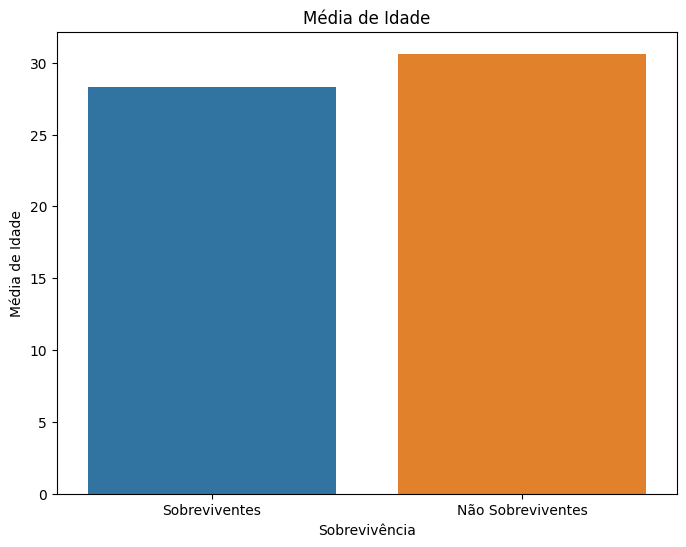

In [37]:
mean_age_survived = train[train['Survived'] == 1]['Age'].mean()
mean_age_not_survived = train[train['Survived'] == 0]['Age'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=['Sobreviventes', 'Não Sobreviventes'], y=[mean_age_survived, mean_age_not_survived])
plt.title('Média de Idade')
plt.xlabel('Sobrevivência')
plt.ylabel('Média de Idade')
plt.show()


A media das idades mostra que a taxa de não sobreviventes é maior que a de sobreviventes.

2- Determine a variação da tarifa paga pelos passageiros e compare-a entre grupos.

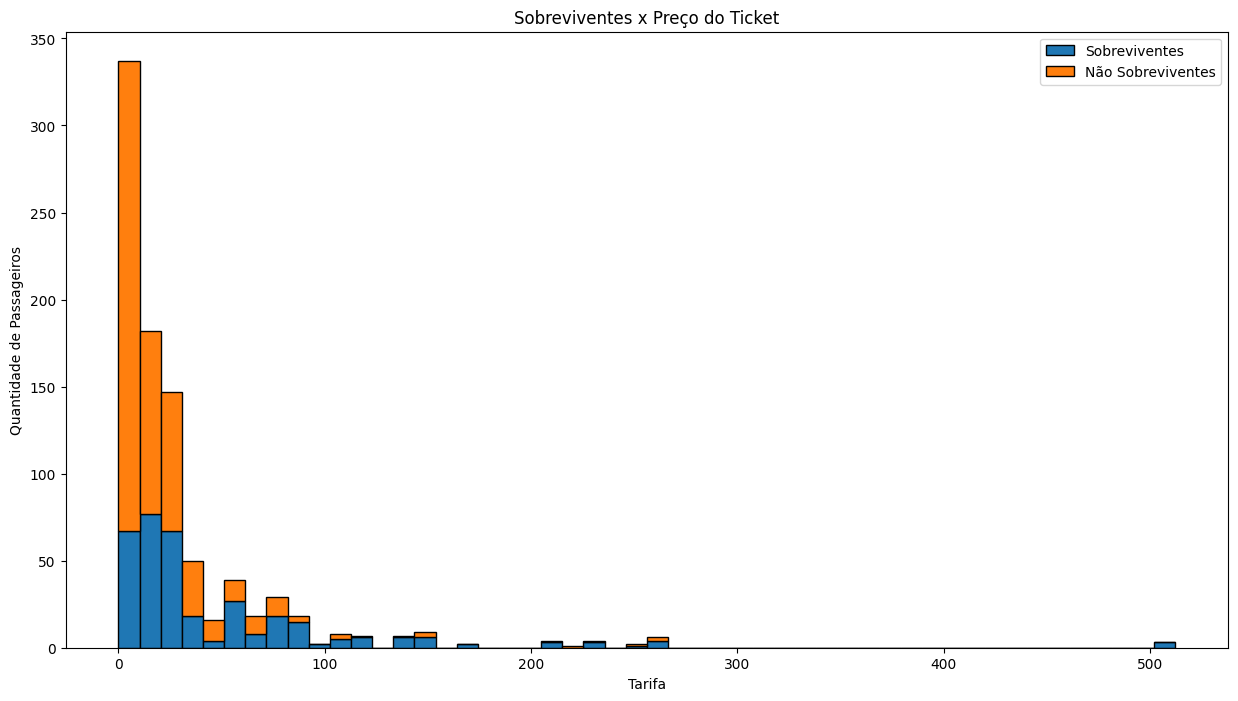

In [38]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']],
         stacked=True, edgecolor='k',
         bins=50)
plt.xlabel('Tarifa')
plt.ylabel('Quantidade de Passageiros')
plt.title('Sobreviventes x Preço do Ticket')
plt.legend(['Sobreviventes','Não Sobreviventes'])
plt.show()

Os gráfico indica que o maior número de passageiros que sobrevivente pagaram um preço de passagem entre 0 e
100 doláres.

Comparação entre genero

Text(0.5, 1.0, 'Sobreviventes x Preço do Ticket')

<Figure size 1500x800 with 0 Axes>

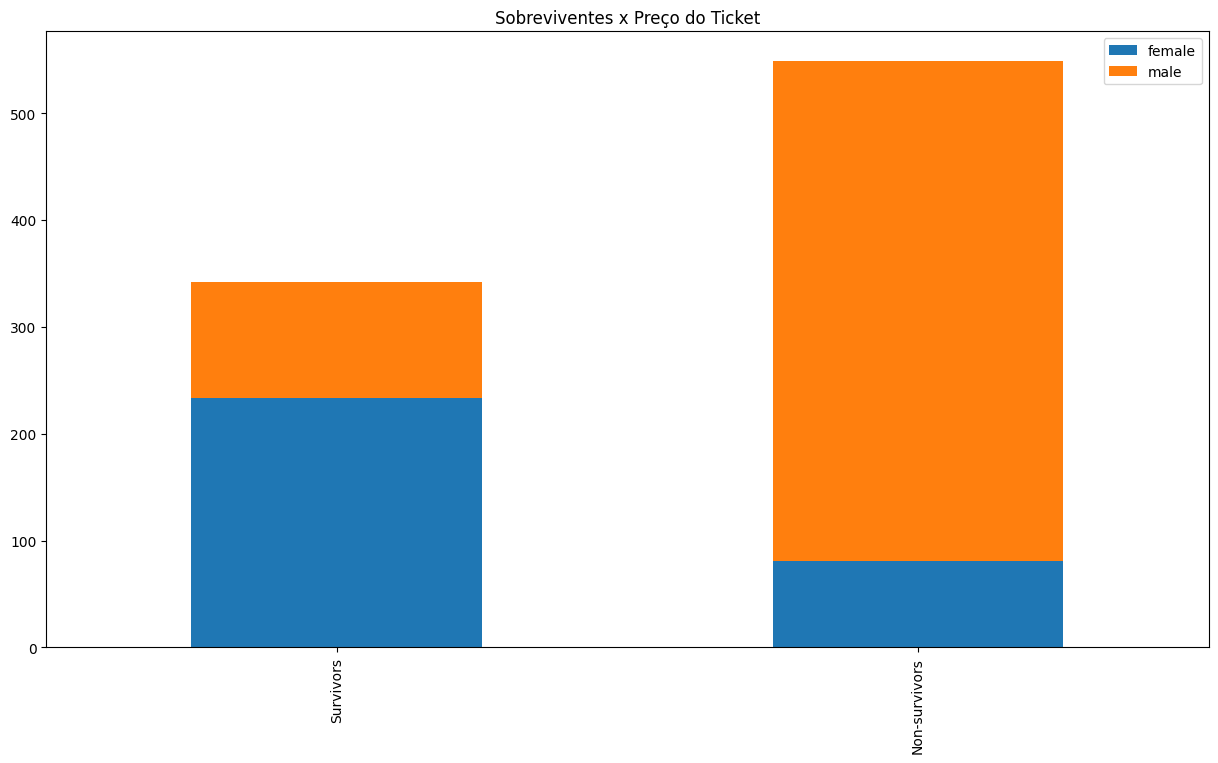

In [39]:
plt.figure( figsize=(15, 8) )

survived_sex = train[train['Survived']==1]['Sex'].value_counts()
dead_sex = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survivors','Non-survivors']
df.plot(kind='bar',stacked=True, figsize=(15,8));
plt.title('Sobreviventes x Preço do Ticket')

3- Calcule a porcentagem de sobreviventes em cada classe socioeconômica e explore as diferenças entre elas.

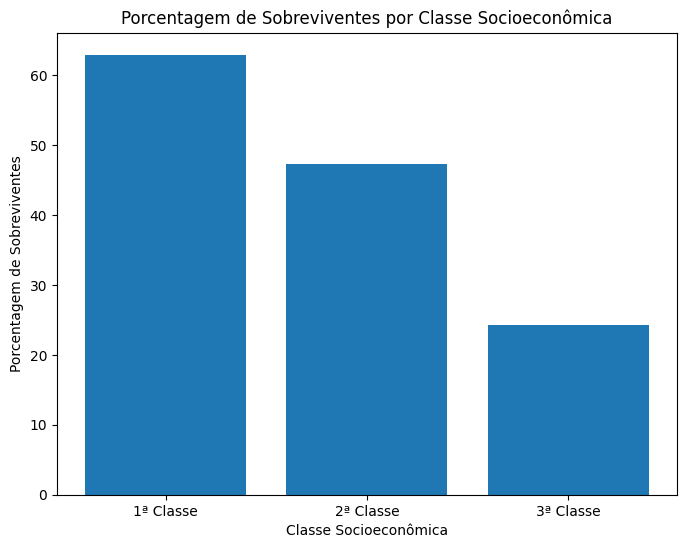

In [40]:
survival_percentage = train.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))
plt.bar(['1ª Classe', '2ª Classe', '3ª Classe'], survival_percentage.values)
plt.xlabel('Classe Socioeconômica')
plt.ylabel('Porcentagem de Sobreviventes')
plt.title('Porcentagem de Sobreviventes por Classe Socioeconômica')
plt.show()


De acordo com o grafico a primeira classe teve a maior porcentagem de sobreviventes. Enquanto a terceira classe teve uma porcentagem muito baixa em relação a primeira e a segunda classe.

**Amostragem e Probabilidade**

1-Realize amostragem aleatória para criar conjuntos de treinamento e teste para avaliar o desempenho do modelo de machine learning.

In [41]:
train_ratio = 0.8
test_ratio = 0.2
train_size = int(len(train) * train_ratio)
test_size = len(train) - train_size
train_set = random.sample(range(len(train)), train_size)
test_set = list(set(range(len(train))) - set(train_set))

train_data = train.iloc[train_set]
test_data = train.iloc[test_set]


2-Calcule a probabilidade de sobrevivência com base em diferentes características, como gênero ou classe, e compare-as.

Probabilidade de Sobrevivência Gênero

In [47]:
total_passengers = len(train)
survived_by_gender = train[train['Survived'] == 1]['Sex'].value_counts()
probability_survival_gender = survived_by_gender / total_passengers
print("Probabilidade de sobrevivência gênero:")
print(probability_survival_gender)



Probabilidade de sobrevivência gênero:
female    0.261504
male      0.122334
Name: Sex, dtype: float64


A probabilidade indica que 26.15% das mulheres sobreviveram e que aproximadamente 12.23% dos homens sobreviveram

Probabilidade de Sobrevivência Classe

In [43]:
survived_by_class = train[train['Survived'] == 1]['Pclass'].value_counts()
probability_survival_class = survived_by_class / total_passengers
print("Probabilidade de sobrevivência classe:")
print(probability_survival_class)

Probabilidade de sobrevivência classe:
1    0.152637
3    0.133558
2    0.097643
Name: Pclass, dtype: float64


A probabilidade indica que 15.26% dos passageiros da primeira classe sobreviveram, 13.36% dos passageiros da terceira classe sobreviveram e 9.76% dos passageiros da  segunda classe sobreviveram.

**Analisando as duas probabilidades podemos perceber que mulheres e passageiros da primeira classe tiveram mais chance de sobrevivencia.**

**Regressão Linear**

1-Aplique regressão linear para prever a taxa de sobrevivência com base em características relevantes.

2-Avalie a importância de cada variável independente no modelo de regressão linear.


3-Analise a qualidade do ajuste do modelo e interprete os coeficientes resultantes.

Escolhi fazer uma previsão de sobrevivência para um novo passageiro sendo do gênero feminino com idade de 25 anos e da primeira classe, pois de acordo com a minha analise teria uma boa taxa de sobrevivencia.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [45]:
data = pd.read_csv('train.csv')
features = ['Sex', 'Age', 'Pclass']
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})

X = data[features]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy*100:.2f}%')

new_passenger = [[0, 25, 1]]
prediction = model.predict_proba(new_passenger)[0][1] * 100
print(f'Previsão de sobrevivência para o passageiro com base nas caracteristicas: {prediction:.2f}%')


Acurácia: 81.01%
Previsão de sobrevivência para o passageiro com base nas caracteristicas: 92.02%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Machine Learning**

Listando colunas com dados ausentes

Imputar colunas com valores nulos

1-Implemente algoritmos de classificação, como árvores de decisão e radom forest, para prever a sobrevivência dos passageiros.

Remover linhas com valores nulos

In [61]:
train = train.dropna()

Converter variaveis categoricas em numericas.

In [62]:
X = train.drop('Survived',axis=1)
y = train['Survived']
X = pd.get_dummies(X)

Avaliar o desempenho

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42)


 implementando o algoritmo para problemas de classificação.

In [64]:
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier()

Fazer previsoes de dados teste.

In [65]:
y_pred = arvore.predict(X_test)

Acuracia:

In [66]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7837837837837838

A acuracia acima indica que o modelo de árvore de decisão teve uma taxa de acerto de cerca de 78.38%.

Liata de sobreviventes 0 para nao sobreviventes e 1 para sobreviventes.

In [78]:
result = pd.DataFrame()
result['Passageiro'] = X_test['PassengerId']
result['Sobreviveu'] = y_pred
result


,Passageiro,Sobreviveu
118,119,0
251,252,1
742,743,1
544,545,0
712,713,1
96,97,0
139,140,0
337,338,1
577,578,1
492,493,1


In [81]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
forest = RandomForestClassifier()

implementando o algoritmo para problemas de classificação.

In [80]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [83]:
y_predict=forest.predict(X_test)

Acuracia:

In [84]:
accuracy_score(y_test, y_predict)

0.6756756756756757

A acuracia acima indica que o modelo forest de decisão teve uma taxa de acerto de cerca de 67.56%.

2-Realize a validação cruzada para avaliar o desempenho do modelo e ajustar os hiperparâmetros adequados.

3-Compare diferentes algoritmos e técnicas de machine learning em termos de precisão, recall ou outras métricas relevantes.

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()


In [87]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro'
}


In [90]:
from sklearn.model_selection import cross_validate
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision_macro', 'recall_macro']
decision_tree_scores = cross_validate(decision_tree, X, y, cv=kfold, scoring=scoring)
random_forest_scores = cross_validate(random_forest, X, y, cv=kfold, scoring=scoring)

decision_tree_accuracy = decision_tree_scores['test_accuracy'].mean()
decision_tree_precision = decision_tree_scores['test_precision_macro'].mean()
decision_tree_recall = decision_tree_scores['test_recall_macro'].mean()

random_forest_accuracy = random_forest_scores['test_accuracy'].mean()
random_forest_precision = random_forest_scores['test_precision_macro'].mean()
random_forest_recall = random_forest_scores['test_recall_macro'].mean()


In [91]:
print("Decision Tree - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}".format(
    decision_tree_accuracy, decision_tree_precision, decision_tree_recall))
print("Random Forest - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}".format(
    random_forest_accuracy, random_forest_precision, random_forest_recall))


Decision Tree - Accuracy: 0.73, Precision: 0.69, Recall: 0.70
Random Forest - Accuracy: 0.73, Precision: 0.73, Recall: 0.68


Árvore de Decisão obteve uma acurácia de 0.73, precisão de 0.69 e recall de 0.70

A Forest Aleatória também obteve uma acurácia de 0.73, mas com uma precisão ligeiramente maior de 0.73 e recall de 0.68.

Após avaliar os modelos percebe-se que eles tiveram um bom desempenho na previsão de sobrevivência dos passageiros. A acurácia dos dois modelos foi de aproximadamente 73%, o que significa que cerca de 73% das previsões estavam corretas.
Ao analisar métricas como precisão e recall, deu para observar que a Árvore teve uma precisão de 69% e recall de 70%, enquanto a Forest obteve uma precisão de 73% e recall de 68%.
Com base nesses resultados, posso concluir que os dois modelos foram capazes de fazer boas previsões sobre a sobrevivência.
Os modelos utilizados foram capazes de identificar corretamente os passageiros que sobreviveram em cerca de 70% dos casos.



